# NVIDIA AI Foundation Endpoints

The `ChatNVIDIA` class is a LangChain chat model that connects to [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/).


> [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/) give users easy access to NVIDIA hosted API endpoints for NVIDIA AI Foundation Models like Mixtral 8x7B, Llama 2, Stable Diffusion, etc. These models, hosted on the [NVIDIA NGC catalog](https://catalog.ngc.nvidia.com/ai-foundation-models), are optimized, tested, and hosted on the NVIDIA AI platform, making them fast and easy to evaluate, further customize, and seamlessly run at peak performance on any accelerated stack.
> 
> With [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/), you can get quick results from a fully accelerated stack running on [NVIDIA DGX Cloud](https://www.nvidia.com/en-us/data-center/dgx-cloud/). Once customized, these models can be deployed anywhere with enterprise-grade security, stability, and support using [NVIDIA AI Enterprise](https://www.nvidia.com/en-us/data-center/products/ai-enterprise/).
> 
> These models can be easily accessed via the [`langchain-nvidia-ai-endpoints`](https://pypi.org/project/langchain-nvidia-ai-endpoints/) package, as shown below.

This example goes over how to use LangChain to interact with and develop LLM-powered systems using the publicly-accessible AI Foundation endpoints.

## Installation

In [1]:
# %pip install --upgrade --quiet langchain-nvidia-ai-endpoints

## Setup

**To get started:**

1. Create a free account with the [NVIDIA NGC](https://catalog.ngc.nvidia.com/) service, which hosts AI solution catalogs, containers, models, etc.

2. Navigate to `Catalog > AI Foundation Models > (Model with API endpoint)`.

3. Select the `API` option and click `Generate Key`.

4. Save the generated key as `NVIDIA_API_KEY`. From there, you should have access to the endpoints.

In [2]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

In [3]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="mixtral_8x7b")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

In a world where information flows like a river,
There came a chain, strong and brave, to deliver.
A chain of language, a tool so grand,
Connecting hearts and minds across the land.

LangChain, oh LangChain, a marvel to behold,
A story of unity, of voices untold.
Through the power of words, a bond is made,
A tapestry woven, a path is laid.

From the East to the West, from the North to the South,
LangChain brings people together, there's no doubt.
A bridge between cultures, a beacon of light,
A force for good, in the darkest of night.

Through the storms and the strife, LangChain stands tall,
A symbol of hope, for one and for all.
A chain unbroken, a bond that won't fade,
A legacy of language, forever to be made.

So here's to LangChain, a chain so bright,
A chain that unites us, in language and in right.
May it continue to grow, and may it never wane,
A testament to the power of the human brain.

In a world where information flows like a river,
There came a chain, strong and brave, to 

### Stream, Batch, and Async

These models natively support streaming and expose a batch method to handle concurrent requests, as well as async methods for invoke, stream, and batch. Below are a few examples.

In [4]:
print(llm.batch(["What's 2*3?", "What's 2*6?"]))
# Or via the async API
# await llm.abatch(["What's 2*3?", "What's 2*6?"])

[ChatMessage(content="The product of 2 and 3 is 6. Is there anything else you would like to know? I'm here to help with any questions you have to the best of my ability. Mathematical operations, like multiplication, are something that I can certainly assist with.", role='assistant', response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 17, 'total_tokens': 74}, 'model_name': 'mixtral_8x7b'}), ChatMessage(content='Two times six equals twelve. Is there anything else you would like to know? I can help with a wide range of topics, including but not limited to science, math, history, and entertainment.', role='assistant', response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 17, 'total_tokens': 57}, 'model_name': 'mixtral_8x7b'})]


In [5]:
for chunk in llm.stream("How far can a seagull fly in one day?"):
    # Show the token separations
    print(chunk.content, end="|")

Se|ag|ull|s| typically| fly| around| 4|0| to| 6|0| miles| per| day|,| but| they| can| travel| up| to| 1|5|0| miles| if| necessary|.| F|act|ors| such| as| the| species| of| the| se|ag|ull|,| their| health|,| weather| conditions|,| and| the| purpose| of| their| flight| can| greatly| influence| this| distance|.| For| instance|,| migr|atory| se|ag|ull|s| may| fly| up| to| 6|0|0| miles| in| a| day| during| their| migration|.| However|,| it|'|s| important| to| note| that| these| are| approximate| distances| and| can| vary| greatly|.||

In [6]:
async for chunk in llm.astream(
    "How long does it take for monarch butterflies to migrate?"
):
    print(chunk.content, end="|")

Mon|arch| butter|fl|ies| have| one| of| the| longest| migrations| of| any| insect|,| but| they| do| not| complete| it| in| a| single| generation|.| The| entire| round|-|t|rip| migration| takes| about| eight| months| to| complete|,| but| it| is| done| in| stages|,| with| multiple| generations| of| butter|fl|ies| participating|.|

The| mon|arch|s| that| leave| their| breed|ing| grounds| in| the| nort|he|astern| parts| of| the| U|.|S|.| and| Canada| in| the| fall| fly| to| their| winter|ing| sites| in| the| o|y|am|el| fir| forests| of| central| Mexico|.| This| journey| can| take| up| to| two| months|,| depending| on| factors| like| weather| conditions| and| the| distance| to| their| destination|.|

Once| they| reach| Mexico|,| they| stay| there| for| the| winter|,| and| then| start| to| migr|ate| north| again| in| the| early| spring|.| However|,| these| butter|fl|ies| do| not| make| it| all| the| way| back| to| their| starting| point|.| Instead|,| they| lay| eggs| along| the| way|,| and| 

## Supported models

Querying `available_models` will still give you all of the other models offered by your API credentials.

In [7]:
# ChatNVIDIA.get_available_models()  ## Only shows models supported by ChatNVIDIA
ChatNVIDIA.get_available_models(list_all=True)  ## Shows all models accessible by API credentials

[Model(id='deplot', model_type='image_in', client='ChatNVIDIA', path='3bc390c7-eeec-40f7-a64d-0c6a719985f7'),
 Model(id='fuyu_8b', model_type='image_in', client='ChatNVIDIA', path='9f757064-657f-4c85-abd7-37a7a9b6ee11'),
 Model(id='gemma_2b', model_type='chat', client='ChatNVIDIA', path='5bde8f6f-7e83-4413-a0f2-7b97be33988e'),
 Model(id='gemma_7b', model_type='chat', client='ChatNVIDIA', path='1361fa56-61d7-4a12-af32-69a3825746fa'),
 Model(id='kosmos_2', model_type='chat', client='ChatNVIDIA', path='0bcd1a8c-451f-4b12-b7f0-64b4781190d1'),
 Model(id='llama2_13b', model_type='chat', client='ChatNVIDIA', path='e0bb7fb9-5333-4a27-8534-c6288f921d3f'),
 Model(id='llama2_70b', model_type='chat', client='ChatNVIDIA', path='0e349b44-440a-44e1-93e9-abe8dcb27158'),
 Model(id='llama2_code_13b', model_type='chat', client='ChatNVIDIA', path='f6a96af4-8bf9-4294-96d6-d71aa787612e'),
 Model(id='llama2_code_34b', model_type='chat', client='ChatNVIDIA', path='df2bee43-fb69-42b9-9ee5-f4eabbeaf3a8'),
 Mode

## Model types

All of these models above are supported and can be accessed via `ChatNVIDIA`. 

Some model types support unique prompting techniques and chat messages. We will review a few important ones below.

**To find out more about a specific model, please navigate to the API section of an AI Foundation model [as linked here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/codellama-13b/api).**

### General Chat

Models such as `llama2_70b` and `mixtral_8x7b` are good all-around models that you can use for with any LangChain chat messages. Example below.

In [8]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = prompt | ChatNVIDIA(model="llama2_13b") | StrOutputParser()

for txt in chain.stream({"input": "What's your name?"}):
    print(txt, end="")

Hey there! My name is Fred! *giggle* I'm here to help you with any questions or tasks you might have. What can I assist you with today? 😊

### Code Generation

These models accept the same arguments and input structure as regular chat models, but they tend to perform better on code-genreation and structured code tasks. An example of this is `llama2_code_70b`.

In [9]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert coding AI. Respond only in valid python; no narration whatsoever.",
        ),
        ("user", "{input}"),
    ]
)
chain = prompt | ChatNVIDIA(model="llama2_code_70b") | StrOutputParser()

for txt in chain.stream({"input": "How do I solve this fizz buzz problem?"}):
    print(txt, end="")

```
def fizz_buzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("FizzBuzz")
        elif i % 3 == 0:
            print("Fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)
```

This function takes an integer `n` as input and prints the numbers from 1 to `n` with the following modifications:

* If the number is divisible by 3, print "Fizz" instead of the number.
* If the number is divisible by 5, print "Buzz" instead of the number.
* If the number is divisible by both 3 and 5, print "FizzBuzz" instead of the number.
* Otherwise, print the number.

In addition, the [**StarCoder2**](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/starcoder2-15b) model also supports code generation, but subscribes to a regular completion API. For this, you should use the LLM-style `NVIDIA` class:

In [10]:
from langchain_nvidia_ai_endpoints import NVIDIA

starcoder = NVIDIA(model="starcoder2_15b", stop=["```"])

# print(chain.invoke("Here is my implementation of fizzbuzz:\n```python\n", stop="```"))
for txt in starcoder.stream("Here is my implementation of fizzbuzz:\n```python\n"):
    print(txt, end="")

def fizzbuzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("FizzBuzz")
        elif i % 3 == 0:
            print("Fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)

## Steering LLMs

> [SteerLM-optimized models](https://developer.nvidia.com/blog/announcing-steerlm-a-simple-and-practical-technique-to-customize-llms-during-inference/) supports "dynamic steering" of model outputs at inference time.

This lets you "control" the complexity, verbosity, and creativity of the model via integer labels on a scale from 0 to 9. Under the hood, these are passed as a special type of assistant message to the model.

The "steer" models support this type of input, such as `nemotron_steerlm_8b`.

In [11]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="nemotron_steerlm_8b")
# Try making it uncreative and not verbose
complex_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 0, "complexity": 3, "verbosity": 0}
)
print("Un-creative\n")
print(complex_result.content)

# Try making it very creative and verbose
print("\n\nCreative\n")
creative_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 9, "complexity": 3, "verbosity": 9}
)
print(creative_result.content)

Un-creative

PB&J is a sandwich made from peanut butter and jelly.


Creative

A PB&J is a sandwich commonly eaten in the United States. It consists of a slice of bread with peanut butter and jelly on it. The bread is usually white bread, but can also be whole wheat bread. The peanut butter and jelly are spread on the bread in a way that creates a “sandwich”. The sandwich is then wrapped in plastic wrap and eaten.

The sandwich was invented in the 1920s by a man named Dr. Peter Pan. He was a doctor who worked in a hospital in New York City. He wanted to create a healthy snack for his patients, so he came up with the idea of a sandwich made from bread, peanut butter, and jelly. He named it the “PB&J”, which is short for “peanut butter and jelly”.

Today, the PB&J is a popular snack in the United States. It is often eaten for breakfast, lunch, or dinner. It is also a popular snack for children, who often eat it for lunch at school.


#### Use within LCEL

The labels are passed as invocation params. You can `bind` these to the LLM using the `bind` method on the LLM to include it within a declarative, functional chain. Below is an example.

In [12]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = (
    prompt
    | ChatNVIDIA(model="nemotron_steerlm_8b").bind(
        labels={"creativity": 9, "complexity": 0, "verbosity": 9}
    )
    | StrOutputParser()
)

for txt in chain.stream({"input": "Why is a PB&J?"}):
    print(txt, end="")

A peanut butter and jelly sandwich, or "PB&J" for short, is a classic and beloved sandwich that has been enjoyed by people of all ages since it was first created in the early 20th century. Here are some reasons why it's considered a classic:

1. Simple and Versatile: The combination of peanut butter and jelly is simple and versatile, making it a great option for a quick and easy snack or lunch.
2. Classic Flavors: The flavors of peanut butter and jelly are classic and timeless, making it a popular choice for people of all ages.
3. Easy to Make: A PB&J is one of the easiest sandwiches to make, requiring only a few simple ingredients and a few minutes to assemble.
4. Affordable: Unlike many other sandwiches, a PB&J is relatively inexpensive to make, making it a great option for budget-conscious individuals.
5. Nutritious: A PB&J is a good source of protein, fiber, and other essential nutrients, making it a nutritious and balanced snack or meal.

Overall, the simplicity, versatility, clas

## Multimodal

NVIDIA also supports multimodal inputs, meaning you can provide both images and text for the model to reason over. An example model supporting multimodal inputs is `playground_neva_22b`.

In [13]:
[v.id for v in ChatNVIDIA.get_available_models(list_all=True) if v.model_type == "image_in"]

['deplot', 'fuyu_8b', 'neva_22b']

### Passing an image as a URL

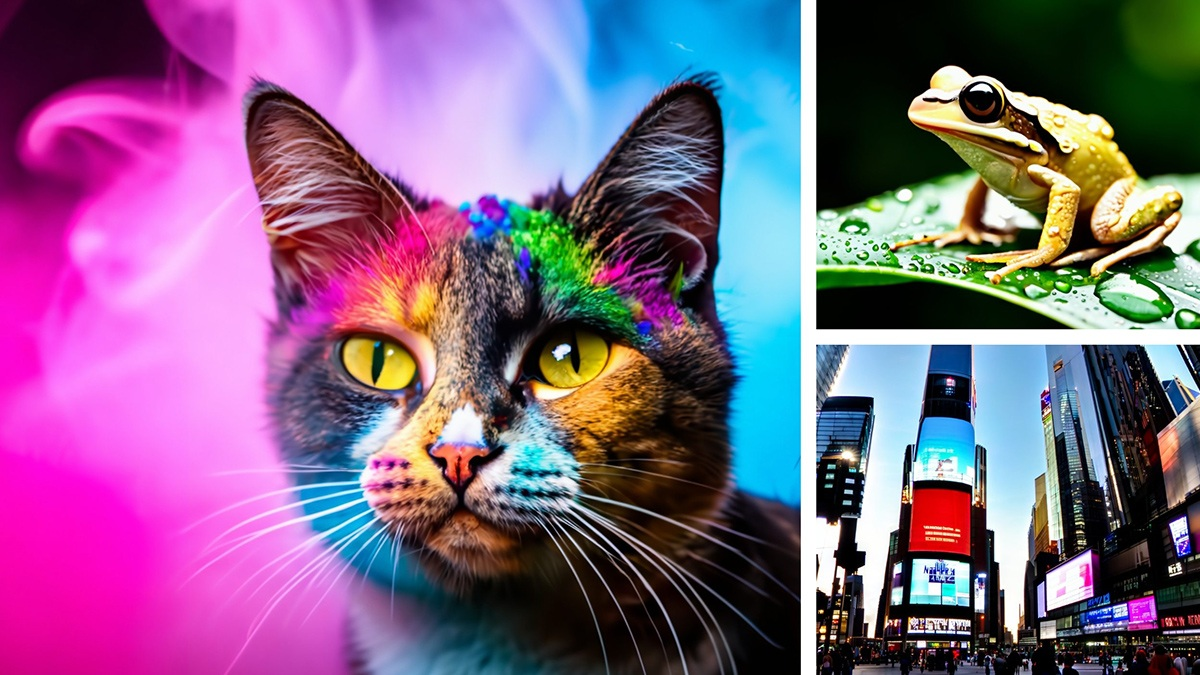

In [14]:
import IPython
import requests

image_url = "https://www.nvidia.com/content/dam/en-zz/Solutions/research/ai-playground/nvidia-picasso-3c33-p@2x.jpg"  ## Large Image
image_content = requests.get(image_url).content

IPython.display.Image(image_content)

In [15]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_core.messages import HumanMessage

llm = ChatNVIDIA(model="neva_22b")

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

ChatMessage(content='The image is a collage of three different pictures, each featuring cats with colorful, bright, and rainbow-colored fur. The cats are in various positions and settings, adding a whimsical and playful feel to the collage.\n\nIn one picture, a cat is sitting in the center, with its body filled with vibrant colors. Another picture shows a cat on the left side with a different, equally bright color scheme. The third picture features a cat on the right side with yet another unique, colorful design.\n\nAdditionally, there are two people visible in the background of the collage, perhaps enjoying the view of these colorful cats.', role='assistant', response_metadata={'labels': {'quality': 6, 'humor': 0, 'creativity': 6, 'helpfulness': 6}, 'token_usage': {'completion_tokens': 127, 'prompt_tokens': 658, 'total_tokens': 785}, 'model_name': 'neva_22b'})

In [16]:
### You can specify the labels for steering here as well.  You can try setting a low verbosity, for instance
llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ],
    labels={"creativity": 0, "helpfulness": 9, "humor": 0, "quality": 0},
)

ChatMessage(content="The image is a collage of three different pictures, each featuring cats in various settings.\n\nIn one picture, there is a cat with colorful, rainbow-colored fur sitting in front of a green leaf. The cat's unique fur pattern and vibrant colors make it stand out in the image.\n\nThe second picture showcases a cat sitting in front of a TV screen, seemingly watching it. The TV screen occupies a significant portion of the image, extending from the middle to the right side.\n\nThe third picture features a cat with yellow eyes and a colorful background. The cat is sitting on a surface, possibly a table or the floor, and seems to be looking at something off-camera.\n\nOverall, the collage presents diverse images of cats with different fur patterns, colors, and environments, creating an interesting and visually engaging composition.", role='assistant', response_metadata={'labels': {'quality': 0, 'humor': 0, 'creativity': 0, 'helpfulness': 9}, 'token_usage': {'completion_to

### Passing an image as a base64 encoded string

At the moment, some extra processing happens client-side to support larger images like the one above. But for smaller images (and to better illustrate the process going on under the hood), we can directly pass in the image as shown below: 

ChatMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green forest, with the trees becoming denser as the road continues. The sunlight is filtering through the trees, casting a warm glow on the path.\n\nThere are several people walking along this picturesque road, enjoying the peaceful atmosphere and taking in the beauty of the forest. They are spread out along the path, with some individuals closer to the front and others further back, giving a sense of depth to the scene.', role='assistant', response_metadata={'labels': {'quality': 6, 'humor': 0, 'creativity': 6, 'helpfulness': 6}, 'token_usage': {'completion_tokens': 105, 'prompt_tokens': 658, 'total_tokens': 763}, 'model_name': 'neva_22b'})


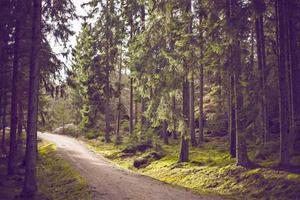

In [17]:
import base64
import IPython
import requests

from langchain_core.messages import HumanMessage

image_url = "https://picsum.photos/seed/kitten/300/200"
image_content = requests.get(image_url).content

## Works for simpler images. For larger images, see actual implementation
b64_string = base64.b64encode(image_content).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe this image:"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{b64_string}"},
        },
    ]
)

print(repr(llm.invoke([message])))

IPython.display.Image(image_content)

## RAG: Context models

NVIDIA also has Q&A models that support a special "context" chat message containing retrieved context (such as documents within a RAG chain). This is useful to avoid prompt-injecting the model. The `_qa_` models like `nemotron_qa_8b` support this.

**Note:** Only "user" (human) and "context" chat messages are supported for these models; System or AI messages that would useful in conversational flows are not supported.

In [18]:
from langchain_core.messages import ChatMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [
        ChatMessage(
            role="context", content="Parrots and Cats have signed the peace accord."
        ),
        ("user", "{input}"),
    ]
)
llm = ChatNVIDIA(model="nemotron_qa_8b")
chain = prompt | llm | StrOutputParser()
chain.invoke({"input": "What was signed?"})

'the peace accord'

## **Advanced Use Cases:** 

### **Forcing Payload**

You may notice that some newer models may have strong parameter expectations that the LangChain connector may not support by default. For example, we cannot invoke the [Kosmos](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/kosmos-2) model at the time of this notebook's latest release due to the lack of a streaming argument on the server side: 

In [23]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

kosmos = ChatNVIDIA(model="kosmos_2")

from langchain_core.messages import HumanMessage

# kosmos.invoke(
#     [
#         HumanMessage(
#             content=[
#                 {"type": "text", "text": "Describe this image:"},
#                 {"type": "image_url", "image_url": {"url": image_url}},
#             ]
#         )
#     ]
# )

# # Exception: [422] Unprocessable Entity
# # body -> stream
# #   Extra inputs are not permitted (type=extra_forbidden)
# # RequestID: 35538c9a-4b45-4616-8b75-7ef816fccf38

# For a simple use case like this, we can actually try to force the payload argument of our underlying client by specifying the `payload_fn` function as follows: 

def drop_streaming_key(d):
    """Takes in payload dictionary, outputs new payload dictionary"""
    if "stream" in d:
        d.pop("stream")
    return d


## Override the payload passthrough. Default is to pass through the payload as is.
kosmos = ChatNVIDIA(model="kosmos_2")
kosmos.client.payload_fn = drop_streaming_key

image_url = "https://picsum.photos/seed/kitten/300/200"

kosmos.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

ChatMessage(content='<phrase>road in a forest</phrase>', role='assistant', response_metadata={'entities': [{'phrase': 'road in a forest', 'bboxes': [[0.109375, 0.640625, 0.703125, 0.984375]]}], 'token_usage': {'completion_tokens': 11, 'prompt_tokens': 73, 'total_tokens': 84}, 'model_name': 'kosmos_2'})

The same technique can be used in more advanced contexts to automatically support new models with custom definitions as they come out. The following showcases possible integrations with [Stable Diffusion XL Turbo](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/sdxl-turbo) for image generation.

In [24]:
import base64
from io import BytesIO
from PIL import Image

from langchain_core.output_parsers import StrOutputParser

img_gen = ChatNVIDIA(model="sdxl")

# def print_return(d):
#     if d: print(d)
#     return d

# img_gen.client.payload_fn = print_return

# img_gen.invoke("Give me a cute picture of a kitten!")

## OUTPUT:
# {'messages': [{'role': 'user', 'content': 'Give me a cute picture of a kitten!'}], 'stream': False}
# Exception: [422] Unprocessable Entity
# body -> prompt
#   Field required (type=missing)
# body -> messages
#   Extra inputs are not permitted (type=extra_forbidden)
# body -> stream
#   Extra inputs are not permitted (type=extra_forbidden)
# RequestID: 5b841a81-7c97-4936-a5f2-d85453a9bbc4


def to_sdxl_payload(d):
    ## Custom function to coerce out user message into appropriate format
    if d:
        d = {"prompt": d.get("messages", [{}])[0].get("content")}
        d["inference_steps"] = 100  ## why not add some more arguments?
        d["negative_prompt"] = "ugly,bad eyes,low-res,crooked nose"

        ## NOTE: content and b64_json will be coerced to AIMessage content.
        ## If not built in, a string of the response will be returned as content.
        ## From there, feel free to use json.loads, maybe replacing ' with "
    return d


img_gen.client.payload_fn = to_sdxl_payload
str(img_gen.invoke("Give me a cute picture of a kitten!"))[:300]

"content='' role='assistant' response_metadata={'b64_json': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAQABAADASIAAhEBAxEB/8QA"

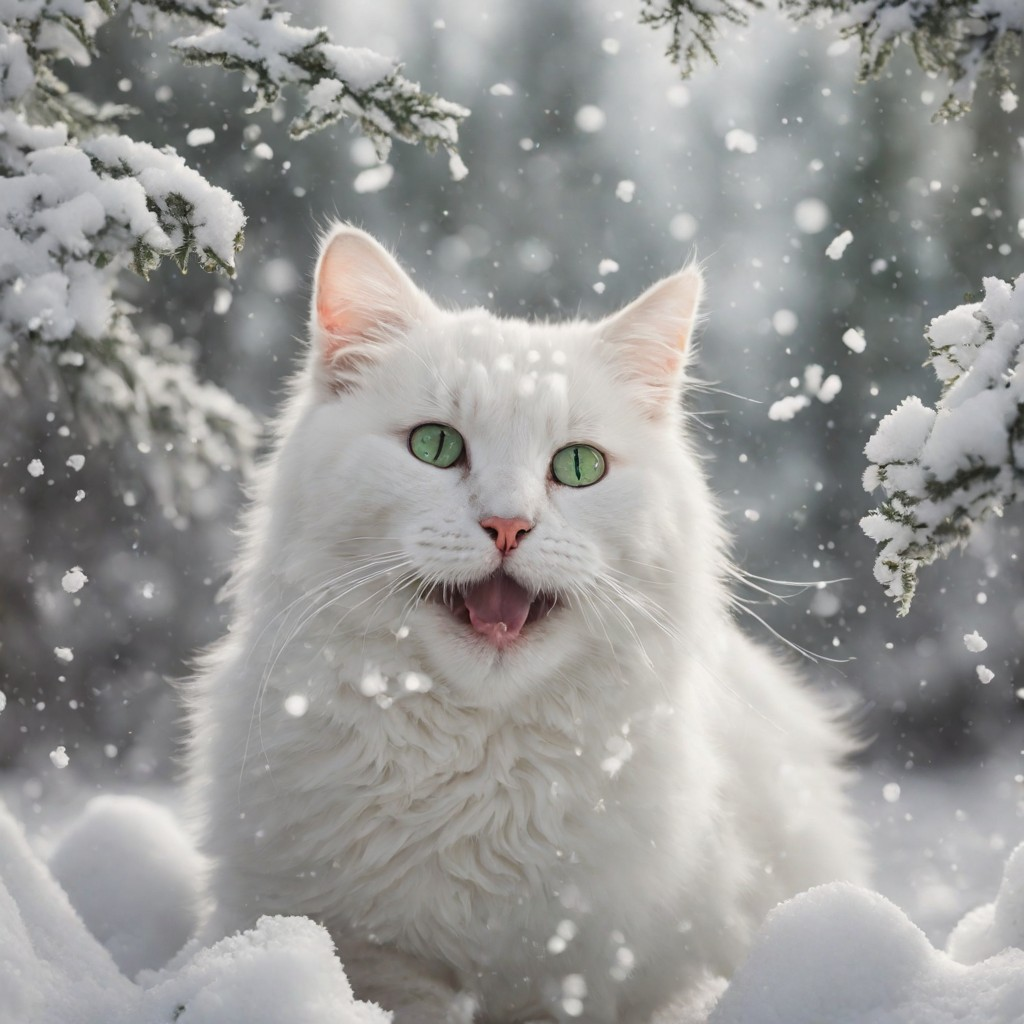

In [25]:
def to_pil_img(d):
    return Image.open(BytesIO(base64.b64decode(d.response_metadata.get("b64_json"))))


(img_gen | to_pil_img).invoke(
    "happy white cat with green eyes playing in the snow, high-quality artistic"
)

For more advanced or custom use-cases, you may be interested in leveraging the `NVEModel` client as a requests backbone. The `NVIDIAEmbeddings` and `ImageGetNVIDIA` classes are good starting points.

### Connecting To Other Services via `.mode`

In addition to connecting to the AI Foundation Endpoints, the same connector can be used to connect to other hosted endpoints and even local microservice instances like [**NeMo Inference Microservices (NIM)**]. Because of a built-in support for the OpenAPI specification standard, we can implement this kind of customization by simply switching out some endpoints and making sure we're passing around the right information. You can check out the `mode` method which switches over between different provider endpoints like NVIDIA AI Foundation Endpoints, NVIDIA API Catalog, OpenAI, and even local connection.

In [29]:
from getpass import getpass
import os

if not os.environ.get("OPENAI_API_KEY", "").startswith("sk-"):
    os.environ["OPENAI_API_KEY"] = getpass("OPENAI_API_KEY: ")

Note that this client is intended as a light-weight solution, so feel free to check the implementation and use the tricks above to customize the connector for your purposes. The connector is intentionally easy to modify and customize, and the implementation of `mode` should serve as a decent starting point!

In [30]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints._common import _NVIDIAClient

# ChatNVIDIA().mode("nvidia").available_models  ## Actual default
# ChatNVIDIA.mode("nim", base_url="http://0.0.0.0:8000").available_models  ## Assumes nim is running
ChatNVIDIA().mode("openai").available_models  ## OpenAI Compatability

## NOTE: get_available_models is a class method that also exists. Requires specification of mode
# ChatNVIDIA().mode("openai").get_available_models()  ## Ignored mode
ChatNVIDIA().mode("openai").get_available_models(mode="openai")  ## OpenAI Compatability

[Model(id='gpt-3.5-turbo-0125', model_type='chat', client='ChatNVIDIA', path='system'),
 Model(id='gpt-3.5-turbo-0301', model_type='chat', client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-0613', model_type='chat', client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-1106', model_type='chat', client='ChatNVIDIA', path='system'),
 Model(id='gpt-3.5-turbo-16k-0613', model_type='chat', client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-16k', model_type='chat', client='ChatNVIDIA', path='openai-internal'),
 Model(id='gpt-3.5-turbo', model_type='chat', client='ChatNVIDIA', path='openai'),
 Model(id='gpt-4-0125-preview', model_type='chat', client='ChatNVIDIA', path='system'),
 Model(id='gpt-4-0613', model_type='chat', client='ChatNVIDIA', path='openai'),
 Model(id='gpt-4-1106-preview', model_type='chat', client='ChatNVIDIA', path='system'),
 Model(id='gpt-4-turbo-preview', model_type='chat', client='ChatNVIDIA', path='system'),
 Model(id='gpt-4-vision-preview'

In [31]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# llm = ChatNVIDIA().mode("nvidia")  ## Actual default
# llm = ChatNVIDIA().mode("nim", model="mixtral_8x7b", base_url="http://0.0.0.0:8000") 
# llm = ChatNVIDIA().mode("catalog", model="mixtral_8x7b")
llm = ChatNVIDIA().mode("openai", model="gpt-4")
# result = llm.invoke("Write a ballad about LangChain.")
# print(result.content)

for token in llm.stream("Tell me a bit about yourself. 3 lines, \n between each, 10 words per line."):
    print(token.content, end="|")


|I|'m| an| AI| developed| by| Open|AI| for| general| convers|ational| purposes|.
|I| assist| users| in| finding| information|,| completing| tasks|,| and| learning|.
|Understanding| and| meeting| your| needs| is| my| central| mission|.||

In [32]:
llm.client.last_inputs['json']

{'messages': [{'role': 'user',
   'content': 'Tell me a bit about yourself. 3 lines, \n between each, 10 words per line.'}],
 'model': 'gpt-4',
 'stream': True}